In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

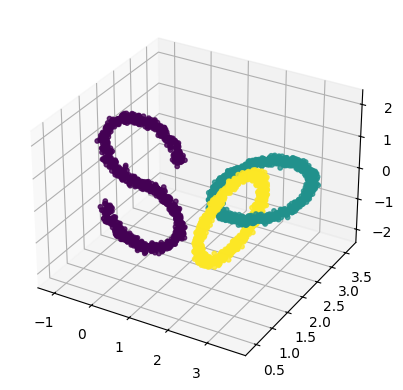

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from clustpy.utils import plot_3d_data
from sklearn.datasets import make_s_curve, make_circles

def create_multiple_shapes(clusters_sizes=1000, seed=1, spread=0.2):
    random_state = np.random.RandomState(seed)

    # Add S-curve
    X_curve, _ = make_s_curve(clusters_sizes, random_state=random_state, noise=spread / 4)
    # Change width of non-S dimension
    X_curve[:, 1] = (
        (X_curve[:, 1] - np.min(X_curve[:, 1]))
        / (np.max(X_curve[:, 1]) - np.min(X_curve[:, 1]))
        * spread
        + spread / 2
        + 1.5
    )

    # Add two circles
    X_circle1, L_circle1 = make_circles(
        2 * clusters_sizes, noise=spread / 4, random_state=random_state
    )
    X_circle1 = X_circle1[L_circle1 == 0]
    # Create second circle that can later be rotated
    X_circle2 = X_circle1.copy()
    # Add third dimension to first circle
    X_circle1 = np.c_[
        X_circle1, random_state.random(clusters_sizes).reshape(-1, 1) * spread - spread / 2
    ]
    # Add third dimension (at first position) to second circle -> rotated version of first circle
    X_circle2 = np.c_[
        random_state.random(clusters_sizes).reshape(-1, 1) * spread - spread / 2, X_circle2
    ]
    # Move second circle to center of first circle
    X_circle2[:, 1] -= 1
    X_circles = np.r_[X_circle1, X_circle2]
    # Move circles to correct position next to the S-curve
    X_circles[:, 1] += 2.5
    X_circles[:, 0] += 2.5

    # Add blob
    # X_blob = random_state.multivariate_normal(mean=[0.5, 0, 0], cov=[[spread/4, 0, 0], [0, spread/4, 0], [0, 0, spread/4]],
    #                                           size=clusters_sizes)

    # Combine data arrays
    X = np.r_[X_curve, X_circles]  # , X_blob]

    # Create labels array
    l = np.zeros(3 * clusters_sizes)
    for i in range(1, 3):
        l[i * clusters_sizes : (i + 1) * clusters_sizes] = i

    return X, l

X, l = create_multiple_shapes()
plot_3d_data(X, l, show_legend=False)
plt.show()

In [3]:
from src.utils.experiments import cache, calc_eval_measures
from src.utils.plots import plot_barplot
from src.utils.metrics import create_and_filter_df

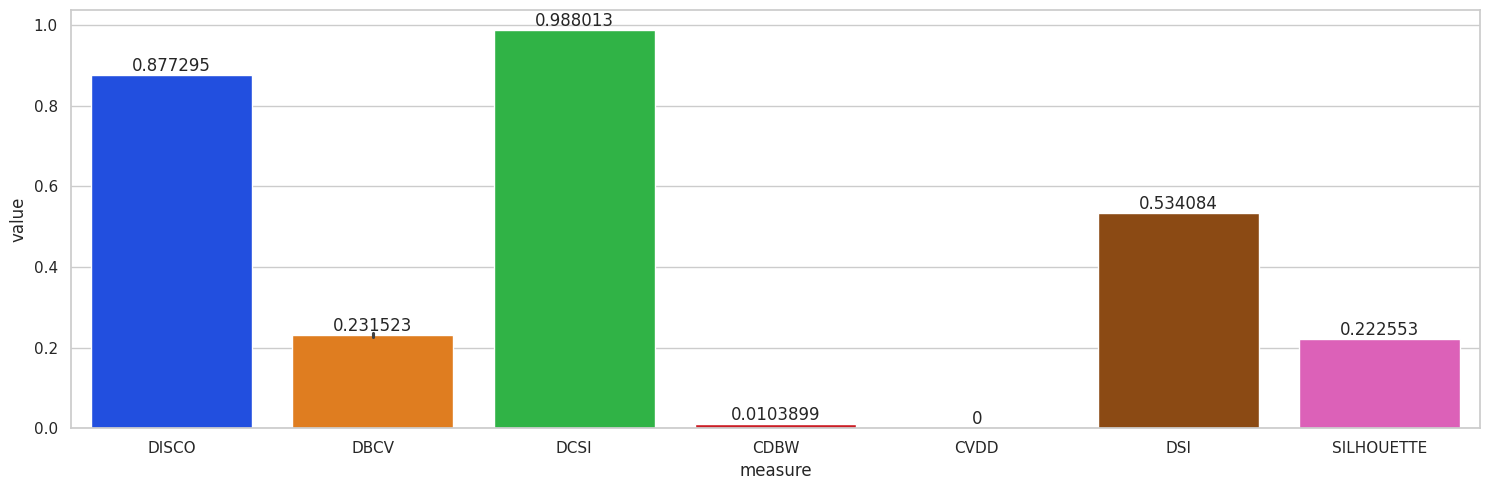

In [4]:
eval_results = calc_eval_measures(X, l)
df = create_and_filter_df(eval_results)
plot_barplot(df, "measure", "value", "measure")
plt.show()

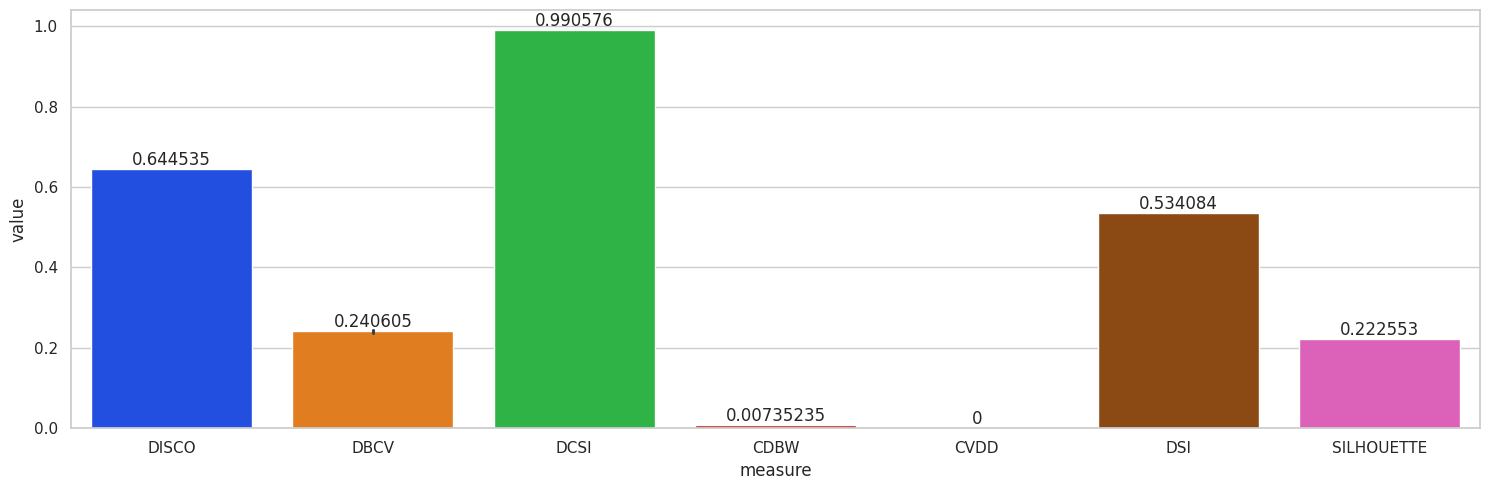

In [5]:
l_ = l.copy()
l_ = l_ - 1

eval_results = calc_eval_measures(X, l_)
df = create_and_filter_df(eval_results)
plot_barplot(df, "measure", "value", "measure")
plt.show()